# TASK 2- Perform Exploratory Data Analysis on dataset SampleSuperstore

# NAME: ANISH JAYAKUMAR

# SUPER STORE ANALYSIS

![title](ssa.jpg)

In [2]:
#importing the packages
import numpy as np
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
#importing the dataset
data= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\GRIP INTERNSHIP\\SampleSuperstore.csv")
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
#to find the shape os the dataset
data.shape

(9994, 13)

In [5]:
#to check the null values in the dataset
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
segment= data["Segment"].value_counts().reset_index()
segment.columns=("Segment", "Counts")
segment

,Segment,Counts
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


In [11]:
#Plotting the pie chart
px.pie(data_frame= segment["Segment"], names= segment.Segment.unique(), values= segment.Counts, 
                   title= "PROPORTIONS OF THE SEGMENTS", hole= 0.38)

In [12]:
cat= data["Category"].value_counts().reset_index()
cat.columns=("Category", "Counts")
cat

,Category,Counts
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


In [13]:
px.pie( data_frame= cat["Category"], names= cat.Category.unique(), values= cat.Counts, 
                   title= "PROPORTIONS OF THE CATEGORIES", hole= 0.38 )

In [14]:
office= data[data["Category"]=="Office Supplies"]
office=office["Sub-Category"].value_counts().reset_index()
office.columns= ("Sub", 'Counts')
office
office_sunburst = px.sunburst(office, path=['Sub'],values='Counts',color ='Counts')
office_sunburst.show()

In [15]:
tech=data[data["Category"]=="Technology"]
tech=tech["Sub-Category"].value_counts().reset_index()
tech.columns=("Technologies", "Counts")

bar_plot1= px.bar(tech, y="Technologies",x='Counts',
             orientation='h',color='Technologies',
            labels={'Technologies':'Technologies','Counts':'COUNTS OF Technologies'})
bar_plot1.show()

In [16]:
furn=data[data["Category"]=="Furniture"]
furn=furn["Sub-Category"].value_counts().reset_index()
furn.columns=("Furnitures", "Counts")

px.scatter( data_frame= furn, x= "Furnitures", y="Counts", color= "Furnitures")

In [17]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

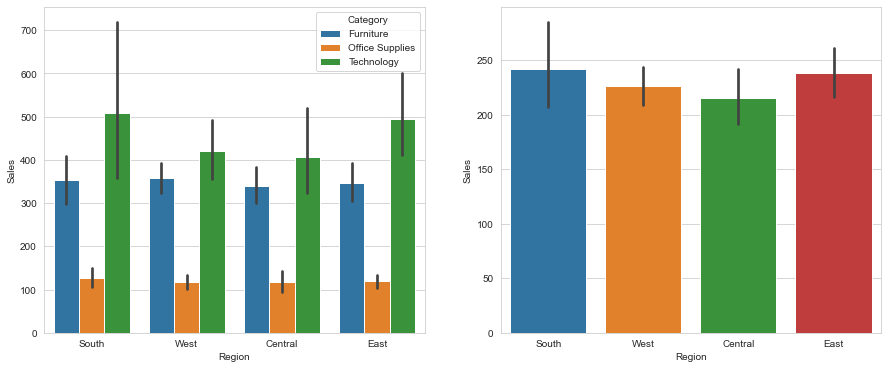

In [18]:
#Setting the grid
sns.set_style("whitegrid")
f, axes= plt.subplots(1,2, figsize=(15,6))

#Plotting the regions for sales
sns.barplot(x= data["Region"], y= data["Sales"], ax= axes[1])

#Plotting the regions for sales by categorizing the category column
sns.barplot(x= data["Region"], y= data["Sales"], hue= data["Category"], ax=axes[0])

Among the regions, South and Central regions are having the highest and the lowest Sales respectively.
West and East Regions are lying just behind South Region with a difference of a small margin.

Perfect! Let's take an analysis of the Central Region

In [19]:
#Filtering the Central region from the main data
df_central= data[data["Region"]=="Central"]

#Selecting necessary columns from the filtered data
df_central= df_central[["City", 'Sales', "Category"]]
df_central


,City,Sales,Category
14,Fort Worth,68.8100,Office Supplies
15,Fort Worth,2.5440,Office Supplies
16,Madison,665.8800,Office Supplies
21,Fremont,19.4600,Office Supplies
22,Fremont,60.3400,Office Supplies
...,...,...,...
9961,Houston,65.5840,Office Supplies
9962,Houston,383.4656,Furniture
9972,Houston,99.5680,Office Supplies
9982,Grand Rapids,35.5600,Office Supplies


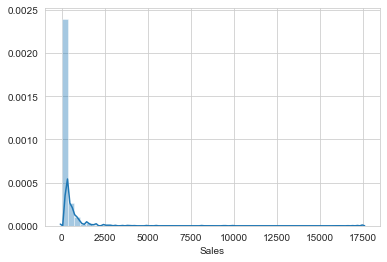

In [20]:
#Distplot-sales of the central region
sns.distplot(df_central["Sales"])

Looks like it has got lot of outlayers.
But the outlayers conveys that the regions of high Sales, so we don't have to worry about that.

Distplot tells us the story that Sales is reaching a high hand at approximately below 500 mark.

Perfect! Let's take a deep look at it.

In [21]:
#Let's take the values of Sales lying below 500
sales=df_central[df_central['Sales']<500]["Category"].value_counts().reset_index()
sales.columns=("Category", "Counts")

#Barplot using plotly
bar_plot = px.bar(sales,y='Category',x='Counts',
             orientation='h',color='Counts',
            labels={'Counts':'COUNTS','Category':'CATEGORIES'})
bar_plot.show()

Having a high hand of exactly 1357 counts, Office Supplies is the dominating category for Sales.

Furniture and Technology are the two main categories where Sales should concentrate on. The Sales are lying below 375 mark for both of them, which is not a good scenario. 

Hence, blue bins are the most affected areas coming under the Sales department of Central Region. Perfect!



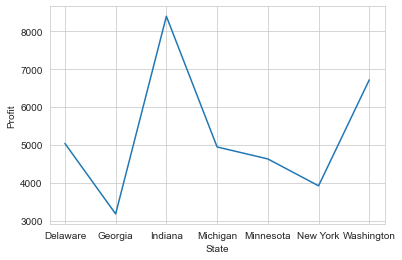

In [22]:
sns.set_style("whitegrid")

profit_1= data[data["Profit"]>3000]
profit_1

sns.lineplot(x= profit_1["State"], y=profit_1["Profit"])


In [23]:
profit= profit_1["Profit"].max()
print("Indiana has the highest profit earned datapoint- {}".format(profit))

Indiana has the highest profit earned datapoint- 8399.976


In [24]:

profit_2= len(data[data["Profit"]<=0])
print("Number of products went loss at Sales- {}".format(profit_2))

Number of products went loss at Sales- 1936


# Consumer Analysis

In [25]:
consumer= data[data["Segment"]=="Consumer"].reset_index()
consumer

,index,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
3,4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
4,5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
5187,9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
5188,9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
5189,9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [26]:
ctgry= consumer["Category"].value_counts().reset_index()
ctgry.columns=("Category", "Counts")
ctgry

,Category,Counts
0,Office Supplies,3127
1,Furniture,1113
2,Technology,951


In [27]:
cns= data[data["Category"]=="Office Supplies"]
cns_cat= cns["Sub-Category"].value_counts().reset_index()
cns_cat.columns=("Category", "Counts")
cns_cat

,Category,Counts
0,Binders,1523
1,Paper,1370
2,Storage,846
3,Art,796
4,Appliances,466
5,Labels,364
6,Envelopes,254
7,Fasteners,217
8,Supplies,190


In [28]:
state=consumer["State"].value_counts().reset_index()
state= state[state["State"]>50]
state.columns=("State","counts")
state

,State,counts
0,California,1048
1,New York,643
2,Texas,524
3,Pennsylvania,284
4,Illinois,276
5,Washington,275
6,Ohio,255
7,Florida,180
8,North Carolina,142
9,Michigan,132


In [29]:
lowsales= consumer[consumer["Sales"]<2]
lowsales.head()

,index,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
42,61,First Class,Consumer,United States,Troy,New York,12180,East,Office Supplies,Art,1.680,1,0.0,0.8400
533,976,Standard Class,Consumer,United States,Portland,Oregon,97206,West,Office Supplies,Binders,1.080,2,0.7,-0.7920
539,987,Same Day,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1.112,2,0.8,-1.8904
579,1068,Second Class,Consumer,United States,Brownsville,Texas,78521,Central,Office Supplies,Supplies,1.744,1,0.2,-0.3488
604,1112,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1.192,2,0.8,-2.0264


In [42]:
#Setting the grid

fig = make_subplots(
    rows=2, cols=2, column_width= [1.5,1.5],row_width= [2,2],
    specs=[[{"type":"pie"},{"type":"bar"}],
           [{"type":"Bar"},{"type":"Bar"}]]
)

fig.add_trace(go.Pie(labels=ctgry["Category"], 
                     values=ctgry['Counts'],textinfo='percent',
                    marker= dict(colors=['green','red'])),row=1, col=1)
fig.add_trace(go.Bar(x=cns_cat["Category"], y=cns_cat["Counts"]), 
                    row=1, col=2)
fig.add_trace(go.Bar(x=state["State"], y=state["counts"]),
                    row=2, col=1)
fig.add_trace(go.Bar(x=lowsales["State"], y=lowsales["Sales"]),
                    row=2, col=2)

fig.update_xaxes(row=1, col=1)
fig.update_xaxes(title_text= "Categories", row=1, col=2)
fig.update_xaxes(title_text="States", row=2, col=1)
fig.update_xaxes(title_text="States" , row=2, col=2)

# Update yaxis properties
fig.update_yaxes( row=1, col=1)
fig.update_yaxes( row=1, col=2)
fig.update_yaxes(title_text="Counts",row=2, col=1)
fig.update_yaxes(title_text="Sales", row=2, col=2)


fig.update_layout(height=900, width=900, title_text="CONSUMER ANALYSIS DASHBOARD")
fig.show()

CONSUMER ANALYSIS

Pie Chart is showing the proportions of the categories in the Category column of the dataset.

Axes[1,2]: The Barchart of products of the Office Supplies and its counts.

Axes[2,1]: The Barchart of State wise counts of consumers .

Axes[2,2]: The Barchart of Statewise counts of Sales


# Phone Analysis

In [31]:
phones= data[data["Sub-Category"]=="Phones"]

phone_sales= phones[phones["Sales"]>2000]
phone_sales

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
487,First Class,Consumer,United States,Chicago,Illinois,60610,Central,Technology,Phones,2735.952,6,0.2,341.9940
1805,First Class,Corporate,United States,Los Angeles,California,90049,West,Technology,Phones,2575.944,7,0.2,257.5944
2492,Standard Class,Consumer,United States,Jamestown,New York,14701,East,Technology,Phones,4548.810,7,0.0,1228.1787
2624,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Phones,2399.600,8,0.0,647.8920
4297,Second Class,Consumer,United States,Tallahassee,Florida,32303,South,Technology,Phones,4367.896,13,0.2,327.5922
5530,Standard Class,Consumer,United States,Omaha,Nebraska,68104,Central,Technology,Phones,2479.960,4,0.0,743.9880
6014,First Class,Home Office,United States,Los Angeles,California,90008,West,Technology,Phones,4158.912,8,0.2,363.9048
6116,Standard Class,Home Office,United States,New York City,New York,10011,East,Technology,Phones,2279.960,4,0.0,592.7896
7583,Standard Class,Corporate,United States,Springfield,Virginia,22153,South,Technology,Phones,3499.930,7,0.0,909.9818
8269,Standard Class,Consumer,United States,Aurora,Illinois,60505,Central,Technology,Phones,2003.168,4,0.2,250.3960


In [32]:

phone_sales_10= phone_sales.sort_values(["Sales"]).reset_index()
phone_sales_10.drop("index", axis=1)
phone_sales_10

fig = px.bar(phone_sales_10,y='State',x='Sales',
             orientation='h',color='Profit',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()

California and NewYork are showing the highest Profit earned regions for PHONES.

Both States crossed 9K mark.

Profits in Nebraska and Tennessee shows lowest Profit in Phones, which has to be improved inorder to get better results

Perfect!

In [33]:
phone_sales_1= phones[phones["Sales"]<10]
phone_sales_1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
488,Second Class,Home Office,United States,Huntsville,Texas,77340,Central,Technology,Phones,7.992,1,0.2,0.5994
1162,Standard Class,Home Office,United States,New York City,New York,10035,East,Technology,Phones,9.990,1,0.0,4.5954
1183,First Class,Consumer,United States,Jacksonville,North Carolina,28540,South,Technology,Phones,7.920,5,0.2,0.6930
1330,Standard Class,Home Office,United States,Lorain,Ohio,44052,East,Technology,Phones,2.970,1,0.4,-0.6435
2293,Standard Class,Corporate,United States,New York City,New York,10009,East,Technology,Phones,4.950,1,0.0,1.3365
2522,Standard Class,Home Office,United States,Oklahoma City,Oklahoma,73120,Central,Technology,Phones,5.500,1,0.0,1.3750
2953,Same Day,Home Office,United States,Glendale,Arizona,85301,West,Technology,Phones,7.920,2,0.2,0.6930
3571,Same Day,Home Office,United States,Seattle,Washington,98105,West,Technology,Phones,7.992,1,0.2,2.6973
3618,Standard Class,Consumer,United States,Los Angeles,California,90004,West,Technology,Phones,5.560,1,0.2,1.7375
4908,Second Class,Consumer,United States,Fairfield,Ohio,45014,East,Technology,Phones,9.588,2,0.4,-2.0774


In [34]:
px.line(data_frame= phone_sales_1, y=phone_sales_1["Sales"], text=phone_sales_1.State )

Ohio is the lowest Phone selling region among other lowest Phone selling states.

Perfect!

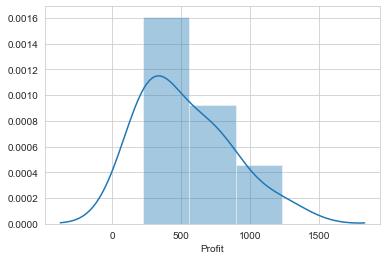

In [35]:
sns.distplot(phone_sales["Profit"])

In [36]:
profit= phone_sales[phone_sales["Profit"]>500]
profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2492,Standard Class,Consumer,United States,Jamestown,New York,14701,East,Technology,Phones,4548.81,7,0.0,1228.1787
2624,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Phones,2399.60,8,0.0,647.8920
5530,Standard Class,Consumer,United States,Omaha,Nebraska,68104,Central,Technology,Phones,2479.96,4,0.0,743.9880
6116,Standard Class,Home Office,United States,New York City,New York,10011,East,Technology,Phones,2279.96,4,0.0,592.7896
7583,Standard Class,Corporate,United States,Springfield,Virginia,22153,South,Technology,Phones,3499.93,7,0.0,909.9818
8312,Standard Class,Consumer,United States,Columbus,Georgia,31907,South,Technology,Phones,2939.93,7,0.0,764.3818


In [37]:
fig = px.bar(profit,y='State',x='Profit',
             orientation='h',color='Segment',
           labels= {"State": "STATE", "Profit": "PROFIT"})
                    
fig.show()

In [38]:
profit_1= phone_sales_1[phone_sales_1["Profit"]<4]
profit_1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
488,Second Class,Home Office,United States,Huntsville,Texas,77340,Central,Technology,Phones,7.992,1,0.2,0.5994
1183,First Class,Consumer,United States,Jacksonville,North Carolina,28540,South,Technology,Phones,7.920,5,0.2,0.6930
1330,Standard Class,Home Office,United States,Lorain,Ohio,44052,East,Technology,Phones,2.970,1,0.4,-0.6435
2293,Standard Class,Corporate,United States,New York City,New York,10009,East,Technology,Phones,4.950,1,0.0,1.3365
2522,Standard Class,Home Office,United States,Oklahoma City,Oklahoma,73120,Central,Technology,Phones,5.500,1,0.0,1.3750
2953,Same Day,Home Office,United States,Glendale,Arizona,85301,West,Technology,Phones,7.920,2,0.2,0.6930
3571,Same Day,Home Office,United States,Seattle,Washington,98105,West,Technology,Phones,7.992,1,0.2,2.6973
3618,Standard Class,Consumer,United States,Los Angeles,California,90004,West,Technology,Phones,5.560,1,0.2,1.7375
4908,Second Class,Consumer,United States,Fairfield,Ohio,45014,East,Technology,Phones,9.588,2,0.4,-2.0774
5713,Standard Class,Home Office,United States,New York City,New York,10035,East,Technology,Phones,5.940,3,0.0,1.6038


In [39]:
px.line(data_frame= profit_1, y=profit_1["Profit"], text=profit_1.State )

Ohio is the lowest Profit earning state for Phones.

Perfect!